In [14]:
import pandas as pd


In [15]:
import os
target_path = 'C:/Users/28648/Desktop'
os.makedirs(target_path, exist_ok=True)

In [16]:
os.chdir(target_path)
print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: C:\Users\28648\Desktop


### Sub B 1

##### Missing value

In [17]:
import pandas as pd

# Load the Excel file
file_path = 'missing_v.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to verify

correlation = df[['Total water consumption', 'Total number of employees']].corr()
print(correlation)

                           Total water consumption  Total number of employees
Total water consumption                    1.00000                    0.25572
Total number of employees                  0.25572                    1.00000


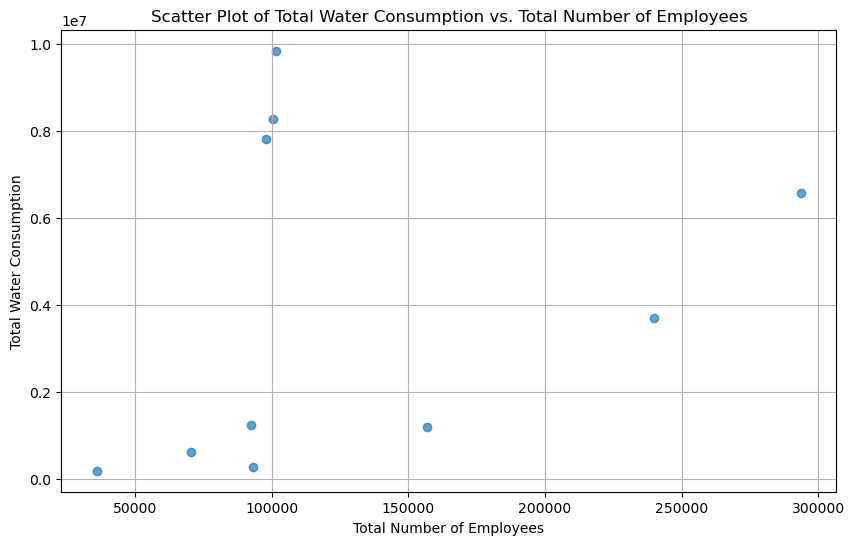

In [18]:
import matplotlib.pyplot as plt
# Scatter plot to check linear relationship
plt.figure(figsize=(10, 6))  # Set figure size for better readability
plt.scatter(df['Total number of employees'], df['Total water consumption'], alpha=0.7)
plt.xlabel('Total Number of Employees')
plt.ylabel('Total Water Consumption')
plt.title('Scatter Plot of Total Water Consumption vs. Total Number of Employees')
plt.grid(True)  # Add grid for better visibility
plt.show()


In [19]:
mean_values = df[[
    'Absolute emissions scope (total)', 'Total water consumption', 
    'Turnover by Gender (Female)', 'Current Employees by Gender (Female)', 
    'Women on the board', 'Anti-corruption training for employees'
]].mean()

# Calculate the median of 'Total number of employees'
median_value = df['Total number of employees'].median()

# Create a new DataFrame with the results
result_df = pd.DataFrame(mean_values, columns=["Mean"]).transpose()
result_df["Median Total number of employees"] = median_value

# Display the new DataFrame
result_df

,Absolute emissions scope (total),Total water consumption,Turnover by Gender (Female),Current Employees by Gender (Female),Women on the board,Anti-corruption training for employees,Median Total number of employees
Mean,328450.031429,2.964476e+06,1.253333,0.501267,0.328746,1.5,98065.0


In [22]:
fill_values = {
    'Absolute emissions scope (total)': 72594.0,
    'Total water consumption': 37612.0,
    'Turnover by Gender (Female)': 0.56,
    'Current Employees by Gender (Female)': 0.53,
    'Women on the board': 0.36,
    'Anti-corruption training for employees': 3.0,
    'Total number of employees': 43145.0
}
df = df.fillna(value=fill_values)
df

,Company Name,Year,Absolute emissions scope (total),Anti-corruption training for employees,Current Employees by Gender (Female),Total number of employees,Total water consumption,Women on the board,Turnover by Gender (Female)
0,AIA Group,2023,55217.00,1.0,0.571,43145.0,340562.00,0.4160,0.56
1,Allianz,2023,136448.00,2.0,0.523,157000.0,1178788.00,0.4167,0.56
2,Barclays,2019,68137.00,1.0,0.460,92400.0,1225000.00,0.3300,0.56
3,Barclays,2020,19750.00,1.0,0.460,43145.0,809000.00,0.3300,0.56
4,Barclays,2021,88800.00,1.0,0.450,43145.0,553048.00,0.3300,0.56
5,BlackRock,2023,72594.00,3.0,0.443,19800.0,37612.00,0.3600,0.47
6,China Life Insurance,2021,1062662.36,3.0,0.566,101459.0,9840934.36,0.3600,2.55
7,China Life Insurance,2022,72594.00,3.0,0.565,100378.0,8278165.86,0.3600,1.85
8,China Life Insurance,2023,689851.08,3.0,0.570,98065.0,7810594.04,0.2500,1.62
9,Citibank,2022,574340.00,1.0,0.500,239903.0,3695203.00,0.5400,0.49


##### 1.1 Score

In [25]:

df['Absolute emissions per person'] = df['Absolute emissions scope (total)'] / df['Total number of employees']
df['Water consumption per person'] = df['Total water consumption'] / df['Total number of employees']

# Select the desired columns
final_df = df[['Company Name', 'Year', 'Absolute emissions per person','Water consumption per person','Turnover by Gender (Female)', 
               'Current Employees by Gender (Female)', 
               'Women on the board', 'Anti-corruption training for employees']]
final_df

,Company Name,Year,Absolute emissions per person,Water consumption per person,Turnover by Gender (Female),Current Employees by Gender (Female),Women on the board,Anti-corruption training for employees
0,AIA Group,2023,1.279801,7.893429,0.56,0.571,0.4160,1.0
1,Allianz,2023,0.869096,7.508204,0.56,0.523,0.4167,2.0
2,Barclays,2019,0.737413,13.257576,0.56,0.460,0.3300,1.0
3,Barclays,2020,0.457759,18.750724,0.56,0.460,0.3300,1.0
4,Barclays,2021,2.058176,12.818357,0.56,0.450,0.3300,1.0
5,BlackRock,2023,3.666364,1.899596,0.47,0.443,0.3600,3.0
6,China Life Insurance,2021,10.473811,96.994198,2.55,0.566,0.3600,3.0
7,China Life Insurance,2022,0.723206,82.469922,1.85,0.565,0.3600,3.0
8,China Life Insurance,2023,7.034631,79.647112,1.62,0.570,0.2500,3.0
9,Citibank,2022,2.394051,15.402905,0.49,0.500,0.5400,1.0


In [26]:
def score_women_indep(value):
    if value == 1:
        return 10
    elif 0.8 <= value < 1:
        return 8
    elif 0.6 <= value < 0.8:
        return 6
    elif 0.4 <= value < 0.6:
        return 4
    elif 0.2 <= value < 0.4:
        return 2
    else:
        return 0
def score_absolute_emissions(value):
    if value < 2:
        return 10
    elif 2 <= value < 5:
        return 8
    elif 5 <= value < 10:
        return 6
    elif 10 <= value < 15:
        return 4
    elif 15 <= value < 20:
        return 2
    else:
        return 0

def score_water_consumption(value):
    # Add the specific scoring criteria for water consumption per person here
    # Assuming similar criteria as absolute emissions for now
    if value < 20:
        return 10
    elif 20 <= value < 40:
        return 8
    elif 40 <= value < 60:
        return 6
    elif 60 <= value < 80:
        return 4
    elif 80 <= value < 200:
        return 2
    else:
        return 0

def Turnover(value):
    if value == 0:
        return 10
    elif 1 <= value < 2:
        return 8
    elif 2 <= value < 3:
        return 6
    elif 3 <= value < 5:
        return 4
    elif 5 <= value < 10:
        return 2
    else:
        return 0
def Anti_corruption(value):
    if value >= 3:
        return 10
    elif value == 2:
        return 7
    elif value == 1:
        return 3
    else:
        return 0
# Apply scoring to the columns
final_df['Women on the board score'] = final_df['Women on the board'].apply(score_women_indep)
final_df['Absolute emissions per person score'] = final_df['Absolute emissions per person'].apply(score_absolute_emissions)
final_df['Water consumption per person score'] = final_df['Water consumption per person'].apply(score_water_consumption)
final_df['Turnover by Gender (Female)'] = final_df['Turnover by Gender (Female)'].apply(Turnover)
final_df['Current Employees by Gender (Female)'] = final_df['Current Employees by Gender (Female)'].apply(score_women_indep)
final_df['Anti-corruption training for employees'] = final_df['Anti-corruption training for employees'].apply(Anti_corruption)
final_df[['Company Name', 'Year', 'Absolute emissions per person score','Water consumption per person score','Turnover by Gender (Female)',
          'Current Employees by Gender (Female)',
          'Women on the board score','Anti-corruption training for employees']]
final_df['Score E'] = 0.5 * final_df['Absolute emissions per person score'] + 0.5 * final_df['Water consumption per person score']
final_df['Score S'] = 0.5*final_df['Turnover by Gender (Female)'] + 0.5* final_df['Current Employees by Gender (Female)']
final_df['Score G'] = 0.5 * final_df['Anti-corruption training for employees'] + 0.5 * final_df['Women on the board score']
final_df['Total ESG Score'] = 0.4 * final_df['Score E'] + 0.3 * final_df['Score S'] + 0.3 * final_df['Score G']

# Define the rating function
def assign_rating(value):
    if 8.571 <= value <= 10:
        return 'AAA'
    elif 7.143 <= value < 8.571:
        return 'AA'
    elif 5.714 <= value < 7.143:
        return 'A'
    elif 4.286 <= value < 5.714:
        return 'BBB'
    elif 2.857 <= value < 4.286:
        return 'BB'
    elif 1.429 <= value < 2.857:
        return 'B'
    else:
        return 'CCC'

# Apply the rating to 'Total ESG Score' column
final_df['Rating'] = final_df['Total ESG Score'].apply(assign_rating)
score_df = final_df[['Company Name','Year', 'Score E','Score S', 'Score G','Total ESG Score', 'Rating']]
score_df

C:\Users\28648\AppData\Local\Temp\ipykernel_19216\3994670258.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Women on the board score'] = final_df['Women on the board'].apply(score_women_indep)
C:\Users\28648\AppData\Local\Temp\ipykernel_19216\3994670258.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Absolute emissions per person score'] = final_df['Absolute emissions per person'].apply(score_absolute_emissions)


,Company Name,Year,Score E,Score S,Score G,Total ESG Score,Rating
0,AIA Group,2023,10.0,2.0,3.5,5.65,BBB
1,Allianz,2023,10.0,2.0,5.5,6.25,A
2,Barclays,2019,10.0,2.0,2.5,5.35,BBB
3,Barclays,2020,10.0,2.0,2.5,5.35,BBB
4,Barclays,2021,9.0,2.0,2.5,4.95,BBB
5,BlackRock,2023,9.0,2.0,6.0,6.00,A
6,China Life Insurance,2021,3.0,5.0,6.0,4.50,BBB
7,China Life Insurance,2022,6.0,6.0,6.0,6.00,A
8,China Life Insurance,2023,5.0,6.0,6.0,5.60,BBB
9,Citibank,2022,9.0,2.0,3.5,5.25,BBB


#### 1.2Benchmark

In [27]:
# Calculate the mean of all companies for the specified columns
mean_values = score_df[['Score E', 'Score S', 'Score G', 'Total ESG Score']].mean()

# Convert the result into a new data frame
mean_df = mean_values.to_frame().T

# Display the resulting data frame
mean_df.index = ['Benchmark']
mean_df

,Score E,Score S,Score G,Total ESG Score
Benchmark,8.4375,2.6875,4.0625,5.4


### Sub B 2.1 & 2.2

Descriptive Statistics for ESG Scores:
         Score E    Score S    Score G  Total ESG Score
count  16.000000  16.000000  16.000000        16.000000
mean    8.437500   2.687500   4.062500         5.400000
std     2.096624   1.537043   1.662077         0.654472
min     3.000000   1.000000   1.500000         4.150000
25%     8.500000   2.000000   2.500000         5.175000
50%     9.000000   2.000000   3.500000         5.475000
75%    10.000000   2.250000   6.000000         5.775000
max    10.000000   6.000000   6.000000         6.400000


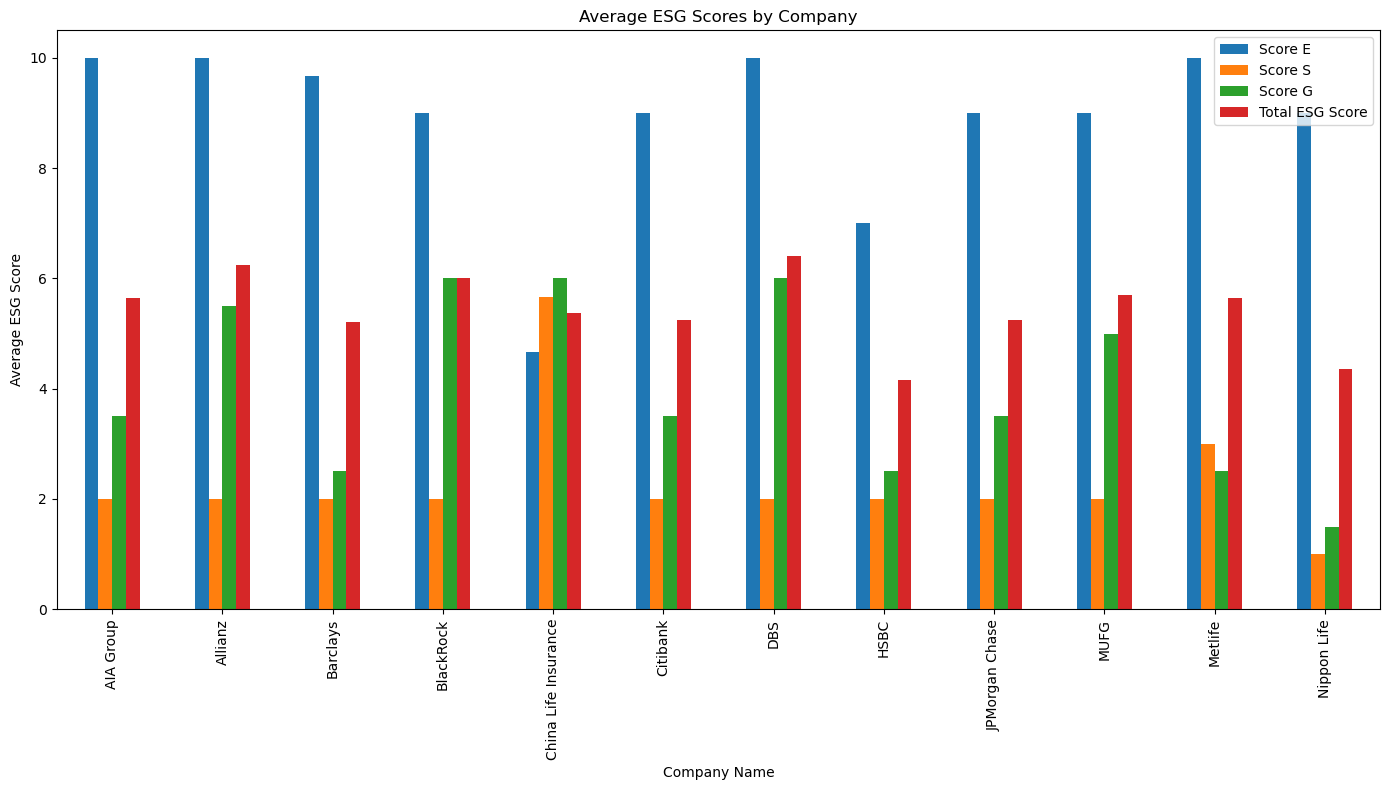

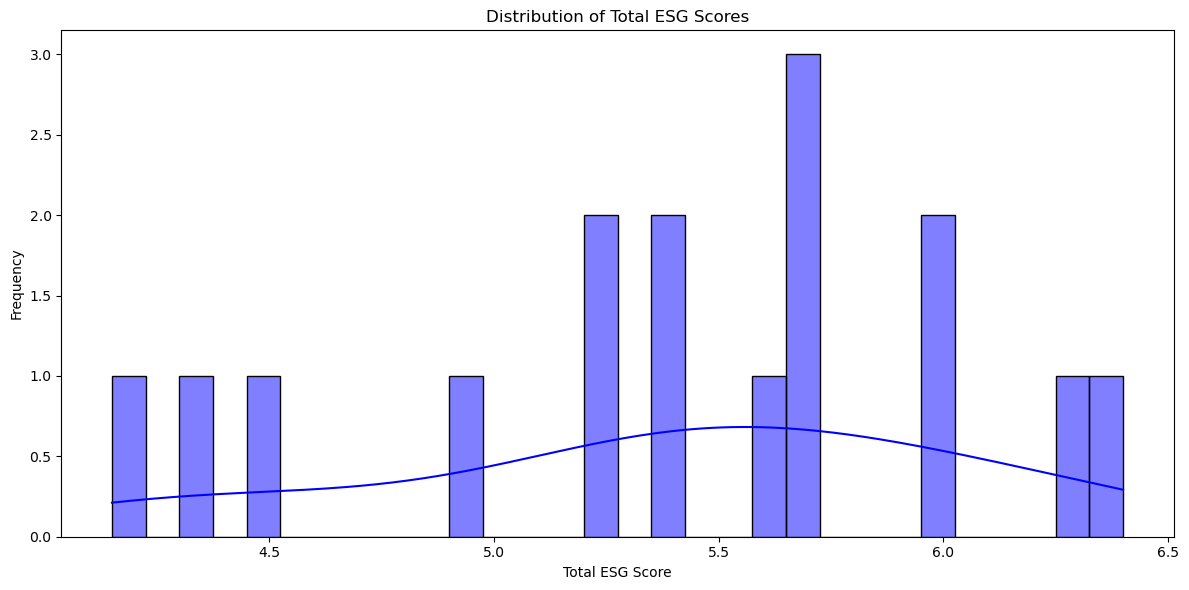

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
desc_stats = score_df[['Score E', 'Score S', 'Score G', 'Total ESG Score']].describe()

# Print out descriptive statistics
print("Descriptive Statistics for ESG Scores:")
print(desc_stats)



# Step 4: Comparison of Average ESG Scores Across Companies
avg_scores = score_df.groupby('Company Name')[['Score E', 'Score S', 'Score G', 'Total ESG Score']].mean()

# Plotting average ESG scores by company
avg_scores.plot(kind='bar', figsize=(14, 8))
plt.title('Average ESG Scores by Company')
plt.xlabel('Company Name')
plt.ylabel('Average ESG Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Step 6: Additional Insights - Distribution of ESG Scores
plt.figure(figsize=(12, 6))
sns.histplot(score_df['Total ESG Score'], kde=True, color='blue', bins=30)
plt.title('Distribution of Total ESG Scores')
plt.xlabel('Total ESG Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### B 2.3

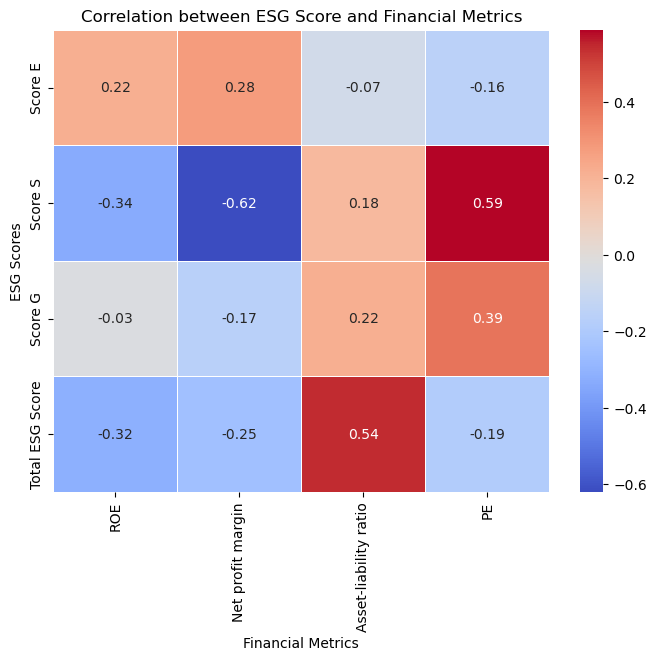

In [32]:
df = pd.read_excel("mer_data.xlsx")  # Replace with the actual file path

esg_columns = ['Score E', 'Score S', 'Score G', 'Total ESG Score']
financial_columns = ['ROE', 'Net profit margin', 'Asset-liability ratio', 'PE']
data = df[esg_columns + financial_columns]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Slice the correlation matrix to show only ESG scores vs. financial metrics
heatmap_data = correlation_matrix.loc[esg_columns, financial_columns]

# Draw the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between ESG Score and Financial Metrics")
plt.xlabel("Financial Metrics")
plt.ylabel("ESG Scores")
plt.show()